In [178]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier, multilayer_perceptron
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [179]:
data_train = pd.read_csv('data\\train.csv')
data_test = pd.read_csv('data\\test.csv')

In [180]:
# data_train.head()

In [181]:
# data_test.head()

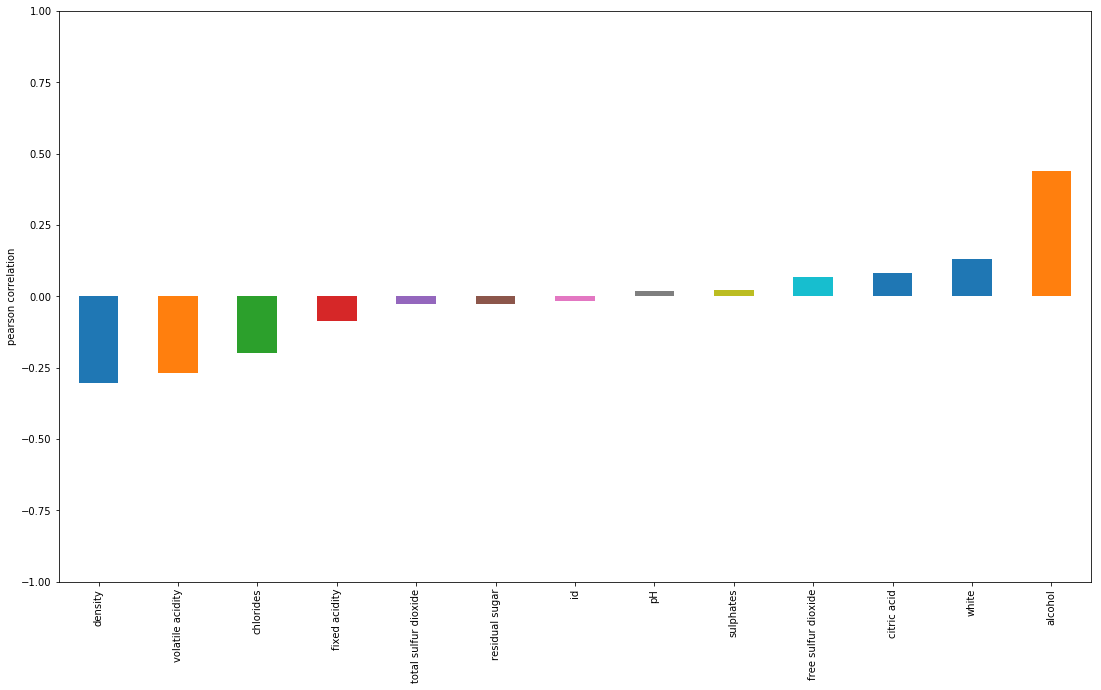

In [182]:
import matplotlib.pyplot as plt
correlations = data_train[data_train.columns[:-1]].corrwith(data_train.quality)
# correlations = correlations.map(abs)
correlations.sort_values(inplace=True)

X_train_new = scaler.fit_transform(data_train[correlations.sort_values().iloc[-8:].index])
X_test_new = scaler.fit_transform(data_test[correlations.sort_values().iloc[-8:].index])

ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [183]:
Y_id = data_test.id

data_train.drop('id', axis=1, inplace=True)
data_test.drop('id', axis=1, inplace=True)

X_train, X_test, Y_train = data_train[data_train.columns[:-1]], data_test, data_train.quality 
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state=42, shuffle=True)

In [184]:
scaler = StandardScaler()

X_train_sld, X_test_sld = scaler.fit_transform(X_train), scaler.fit_transform(X_test) 
x_train_sld, x_test_sld = train_test_split(X_train_sld, random_state=42, shuffle=True)

In [185]:
params = {'activation' : ['relu'], 
          'solver' : ['adam'],
          'alpha' : [0.001, 1],
          'max_iter' : [700],
          'learning_rate' : ['adaptive'],
          'hidden_layer_sizes' : [(100,), (500,), (1000,), (500, 500,), (1000, 1000,)]
         }

GS = GridSearchCV(MLPClassifier(), params, cv=3, scoring='f1_micro', return_train_score=False)

In [186]:
GS.fit(X_train_sld, Y_train);
# help(GridSearchCV)
# help(MLPClassifier)

In [187]:
results_df = pd.DataFrame(GS.cv_results_).drop(['params'], axis=1)
results_df.sort_values('rank_test_score', inplace=True)
results_df.drop(['rank_test_score'], axis=1, inplace=True)

results_df.head()

,mean_fit_time,mean_score_time,mean_test_score,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score
4,138.380305,0.100681,0.589180,relu,0.001,"(1000, 1000)",adaptive,700,adam,0.595787,0.592470,0.579260,16.788388,0.018908,0.007138
0,2.118216,0.015621,0.569606,relu,0.001,"(100,)",adaptive,700,adam,0.576037,0.568692,0.564069,0.243180,0.000008,0.004930
3,43.383184,0.048092,0.568727,relu,0.001,"(500, 500)",adaptive,700,adam,0.575379,0.569353,0.561427,3.219310,0.014272,0.005715
1,5.108987,0.016081,0.566088,relu,0.001,"(500,)",adaptive,700,adam,0.564845,0.581242,0.552180,0.232894,0.000657,0.011891
6,2.560877,0.011801,0.562349,relu,1,"(500,)",adaptive,700,adam,0.565504,0.566050,0.555482,0.425658,0.005392,0.004857


In [188]:
best_model = GS.best_estimator_
# best_model.fit(X_train_sld, Y_train)

Y_pred = best_model.predict(X_test_sld)

In [189]:
best_model.fit(x_train_sld, y_train);

y_pred = best_model.predict(x_test_sld)

In [190]:
print("F-Score", f1_score(y_test, y_pred, average='micro'))

F-Score 0.5708003518029904


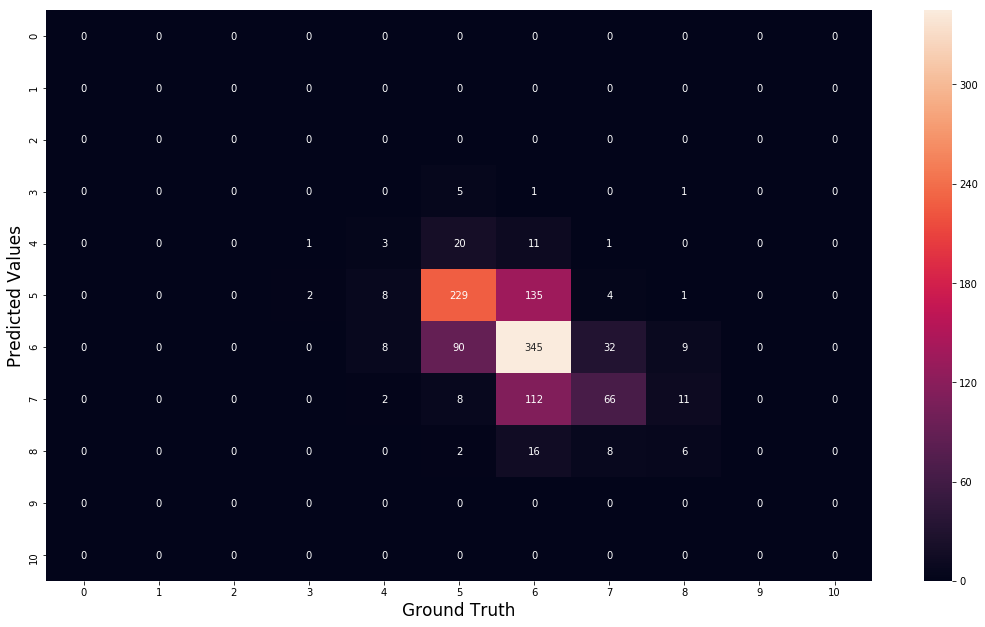

In [191]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels=np.arange(0, 11, 1)), fmt='d', annot=True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xlabel('Ground Truth', fontsize=17);
plt.ylabel('Predicted Values', fontsize=17);

# fig.savefig('matrix.png')
plt.show()

In [192]:
results = pd.DataFrame(data={'id' : Y_id, 'quality' : Y_pred})

results.to_csv('results\\results_5.csv', index=False)